In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline 
%config InlineBackend.figure_format ='retina'

In [2]:
import glob, os
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from MeV_UED import mol_geom, Atomic_Scattering_Cross_Sections, Diffraction, mol_traj, mol_trajs, Parameters

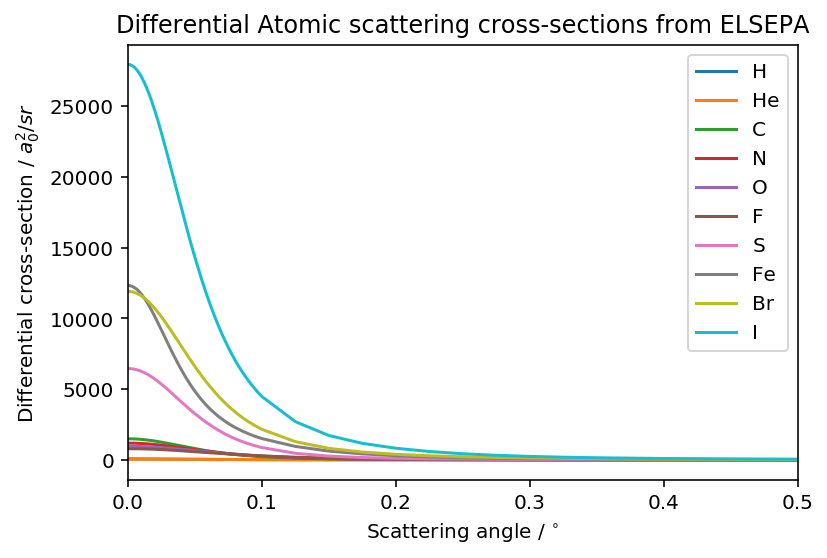

In [3]:
AtScatXSect = Atomic_Scattering_Cross_Sections()

# Figure showing atomic scattering cross-sections
plt.figure()
for element in AtScatXSect.supported_elements:
    exec('plt.plot(AtScatXSect.thetadeg,AtScatXSect.' + element + ", label='" + element + "')")

plt.title('Differential Atomic scattering cross-sections from ELSEPA')
plt.legend(loc='best')
plt.xlim(0,0.5)
plt.ylabel('Differential cross-section / $a_{0}^{2}/{sr}$')
plt.xlabel('Scattering angle / $^{\circ}$')
plt.show()

In [27]:
tmpDir = '/Users/bwt/working/Diffraction_simulation/Traj_SI_113'
os.chdir(tmpDir)
print(f"Setting current directory to: {tmpDir}")
        
traj = mol_traj('traj_2.xyz',AtScatXSect)
traj.proc_traj()

Setting current directory to: /Users/bwt/working/Diffraction_simulation/Traj_SI_113
traj_2.xyz: nAtoms = 5 & nSteps = 2077. Is that correct?


In [9]:
print(len(traj.s), len(traj.tAxis), len(traj.traj_I_at_1D), len(traj.traj_I_mol_1D))

120 2077 2077 2077


traj_2.xyz


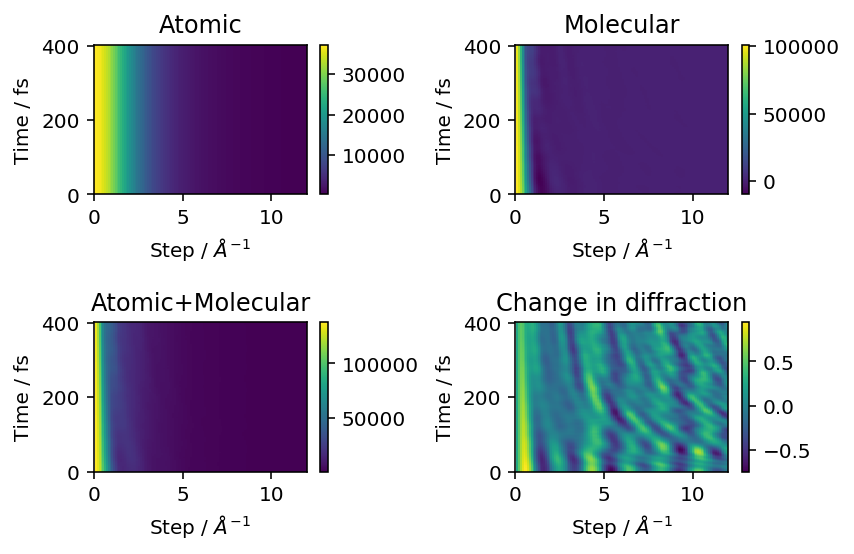

In [10]:
print(traj.fname)

plt.figure()
plt.subplot(2,2,1)
plt.title('Atomic')
plt.pcolormesh(traj.s,traj.tAxis,traj.traj_I_at_1D)
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Molecular')
plt.pcolormesh(traj.s,traj.tAxis,traj.traj_I_mol_1D)
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Atomic+Molecular')
plt.pcolormesh(traj.s,traj.tAxis,np.array(traj.traj_I_at_1D) + np.array(traj.traj_I_mol_1D))
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Change in diffraction')
plt.pcolormesh(traj.s,traj.tAxis,traj.traj_sM_1D)
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.tight_layout()
plt.show()

In [39]:
#%%timeit
trajs = mol_trajs()
trajs.proc_trajs()

Setting current directory to: /Users/bwt/working/Diffraction_simulation/Traj_SI_113
traj_1.xyz: nAtoms = 5 & nSteps = 1364. Is that correct?
traj_10.xyz: nAtoms = 5 & nSteps = 1619. Is that correct?
traj_100.xyz: nAtoms = 5 & nSteps = 1575. Is that correct?
traj_101.xyz: nAtoms = 5 & nSteps = 1172. Is that correct?
traj_102.xyz: nAtoms = 5 & nSteps = 1143. Is that correct?
traj_103.xyz: nAtoms = 5 & nSteps = 1141. Is that correct?
traj_104.xyz: nAtoms = 5 & nSteps = 1147. Is that correct?
traj_105.xyz: nAtoms = 5 & nSteps = 1153. Is that correct?
traj_106.xyz: nAtoms = 5 & nSteps = 1132. Is that correct?
traj_107.xyz: nAtoms = 5 & nSteps = 1142. Is that correct?
traj_108.xyz: nAtoms = 5 & nSteps = 1136. Is that correct?
traj_109.xyz: nAtoms = 5 & nSteps = 1138. Is that correct?
traj_11.xyz: nAtoms = 5 & nSteps = 1852. Is that correct?
traj_110.xyz: nAtoms = 5 & nSteps = 1137. Is that correct?
traj_111.xyz: nAtoms = 5 & nSteps = 1151. Is that correct?
traj_12.xyz: nAtoms = 5 & nSteps = 

In [ ]:
#2min 14s ± 2.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

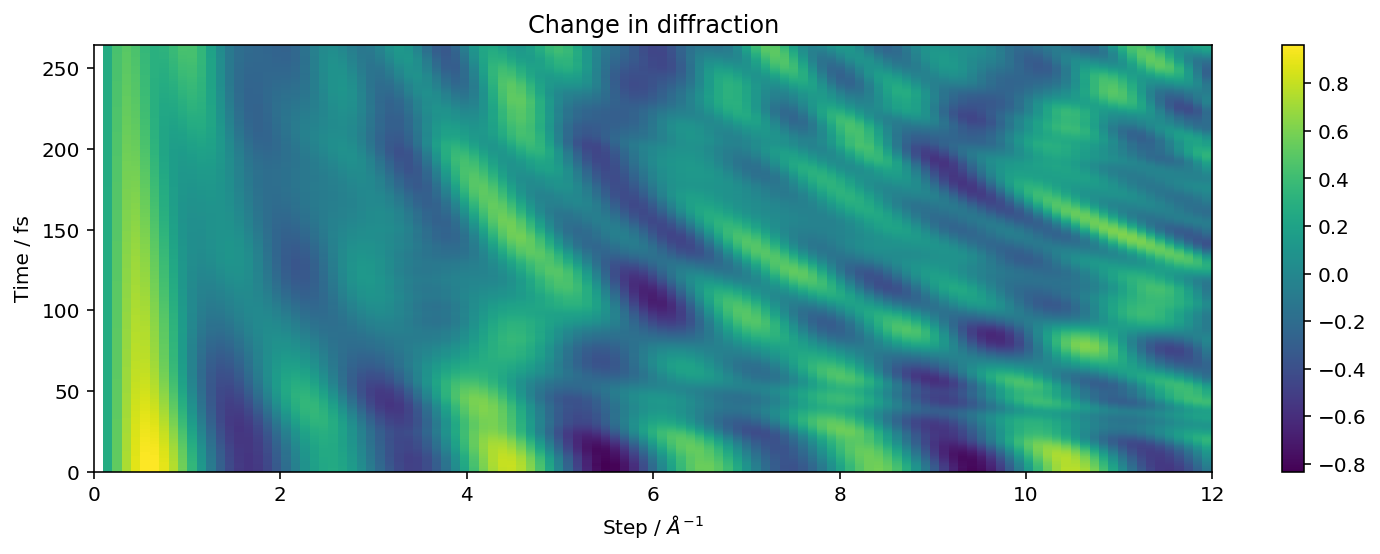

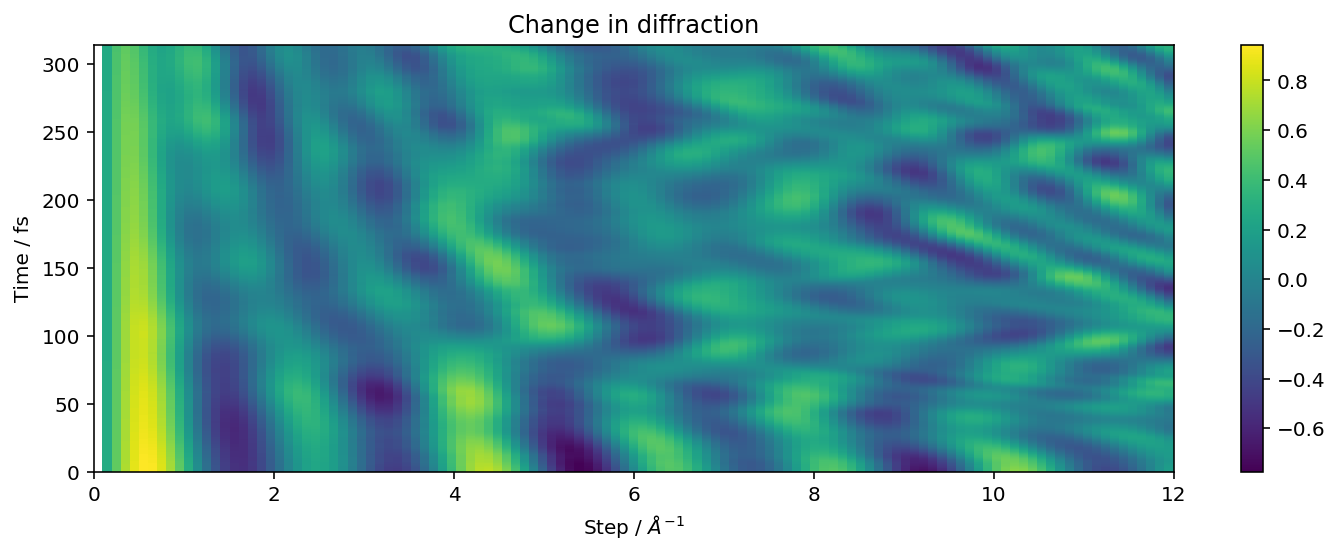

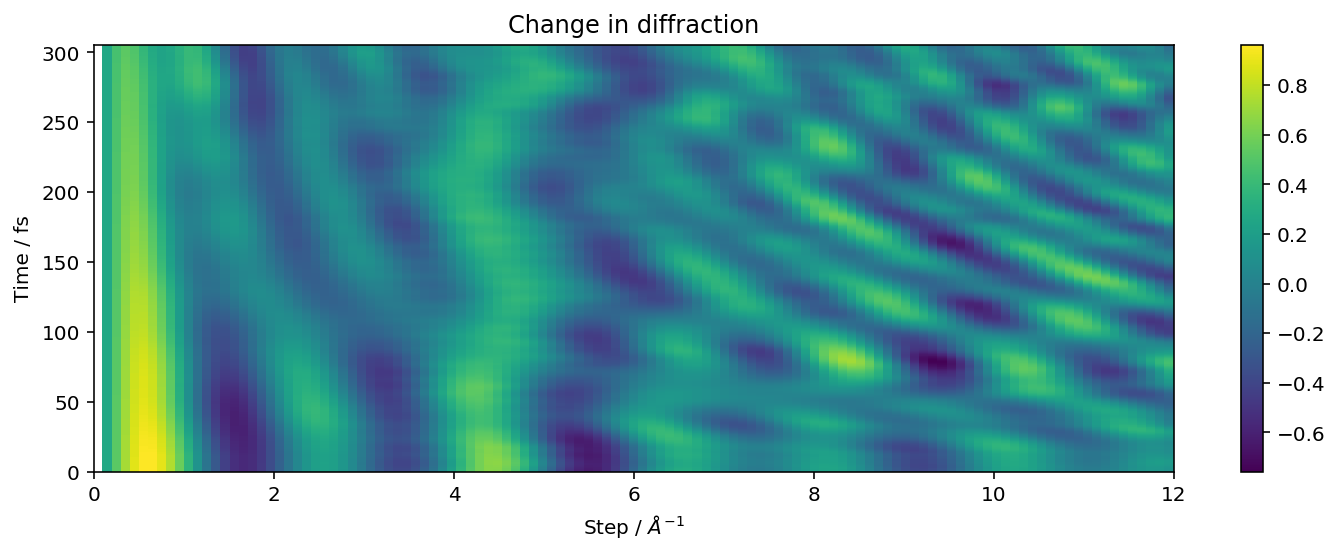

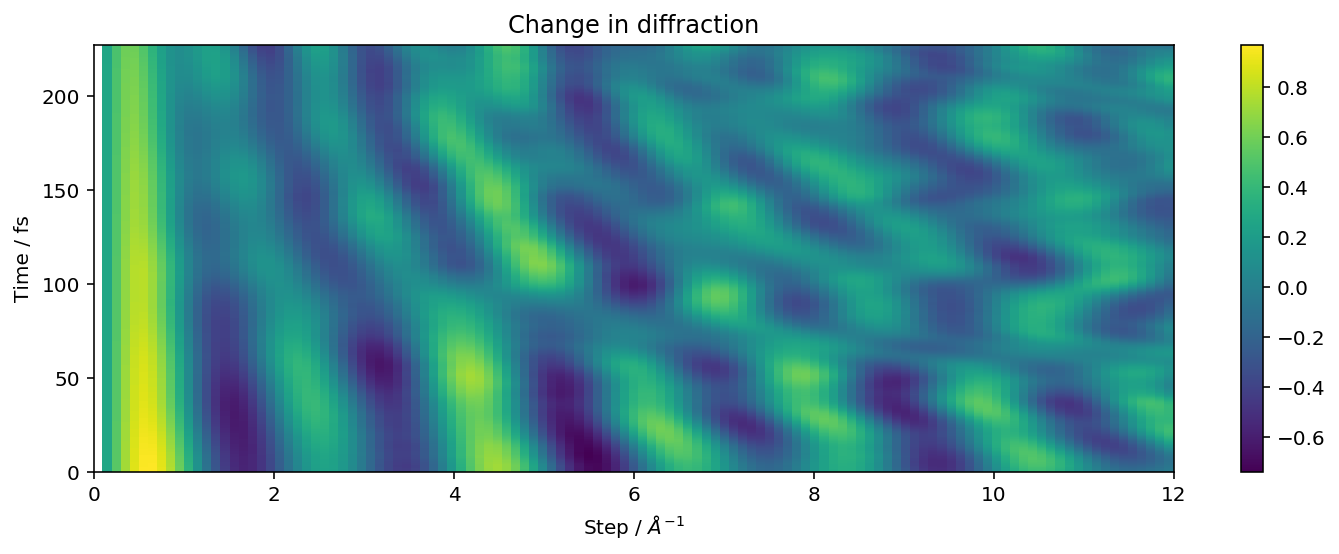

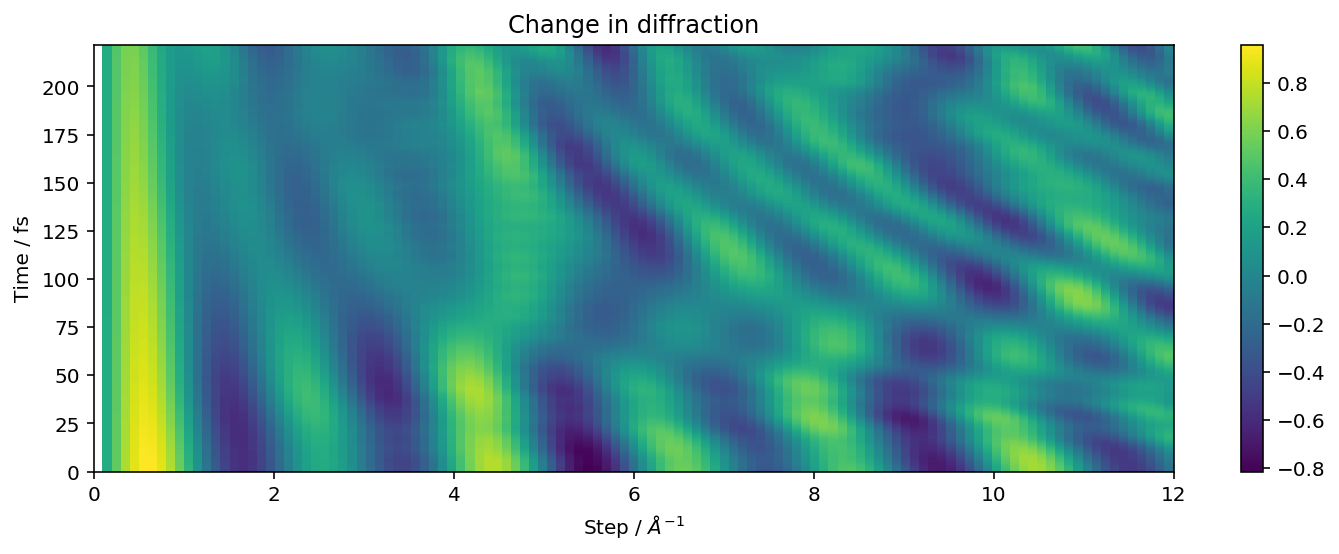

In [40]:
num2show = 5 

for i, sM in enumerate(trajs.alltraj_sM):
    if i < num2show:
        plt.figure( figsize=(50, 4))
        plt.subplot(1,num2show,i+1)
        plt.title('Change in diffraction')
        plt.pcolormesh(traj.s,traj.tAxis[:len(sM)],sM)
        plt.xlabel('Step / $\AA^{-1}$')
        plt.ylabel('Time / fs')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

In [61]:
minlen = min(len(sM) for sM in trajs.alltraj_sM)
print(f"Shortest trajectory has {minlen} steps")
alltraj_sMnp = np.array([sM[:minlen,:] for sM in trajs.alltraj_sM])
meantraj_sM  = np.mean(alltraj_sMnp, axis=0)

alltraj_molnp  = np.array([mol[:minlen,:] for mol in trajs.alltraj_mol])
meantraj_mol = np.mean(alltraj_molnp, axis=0)

Shortest trajectory has 455 steps


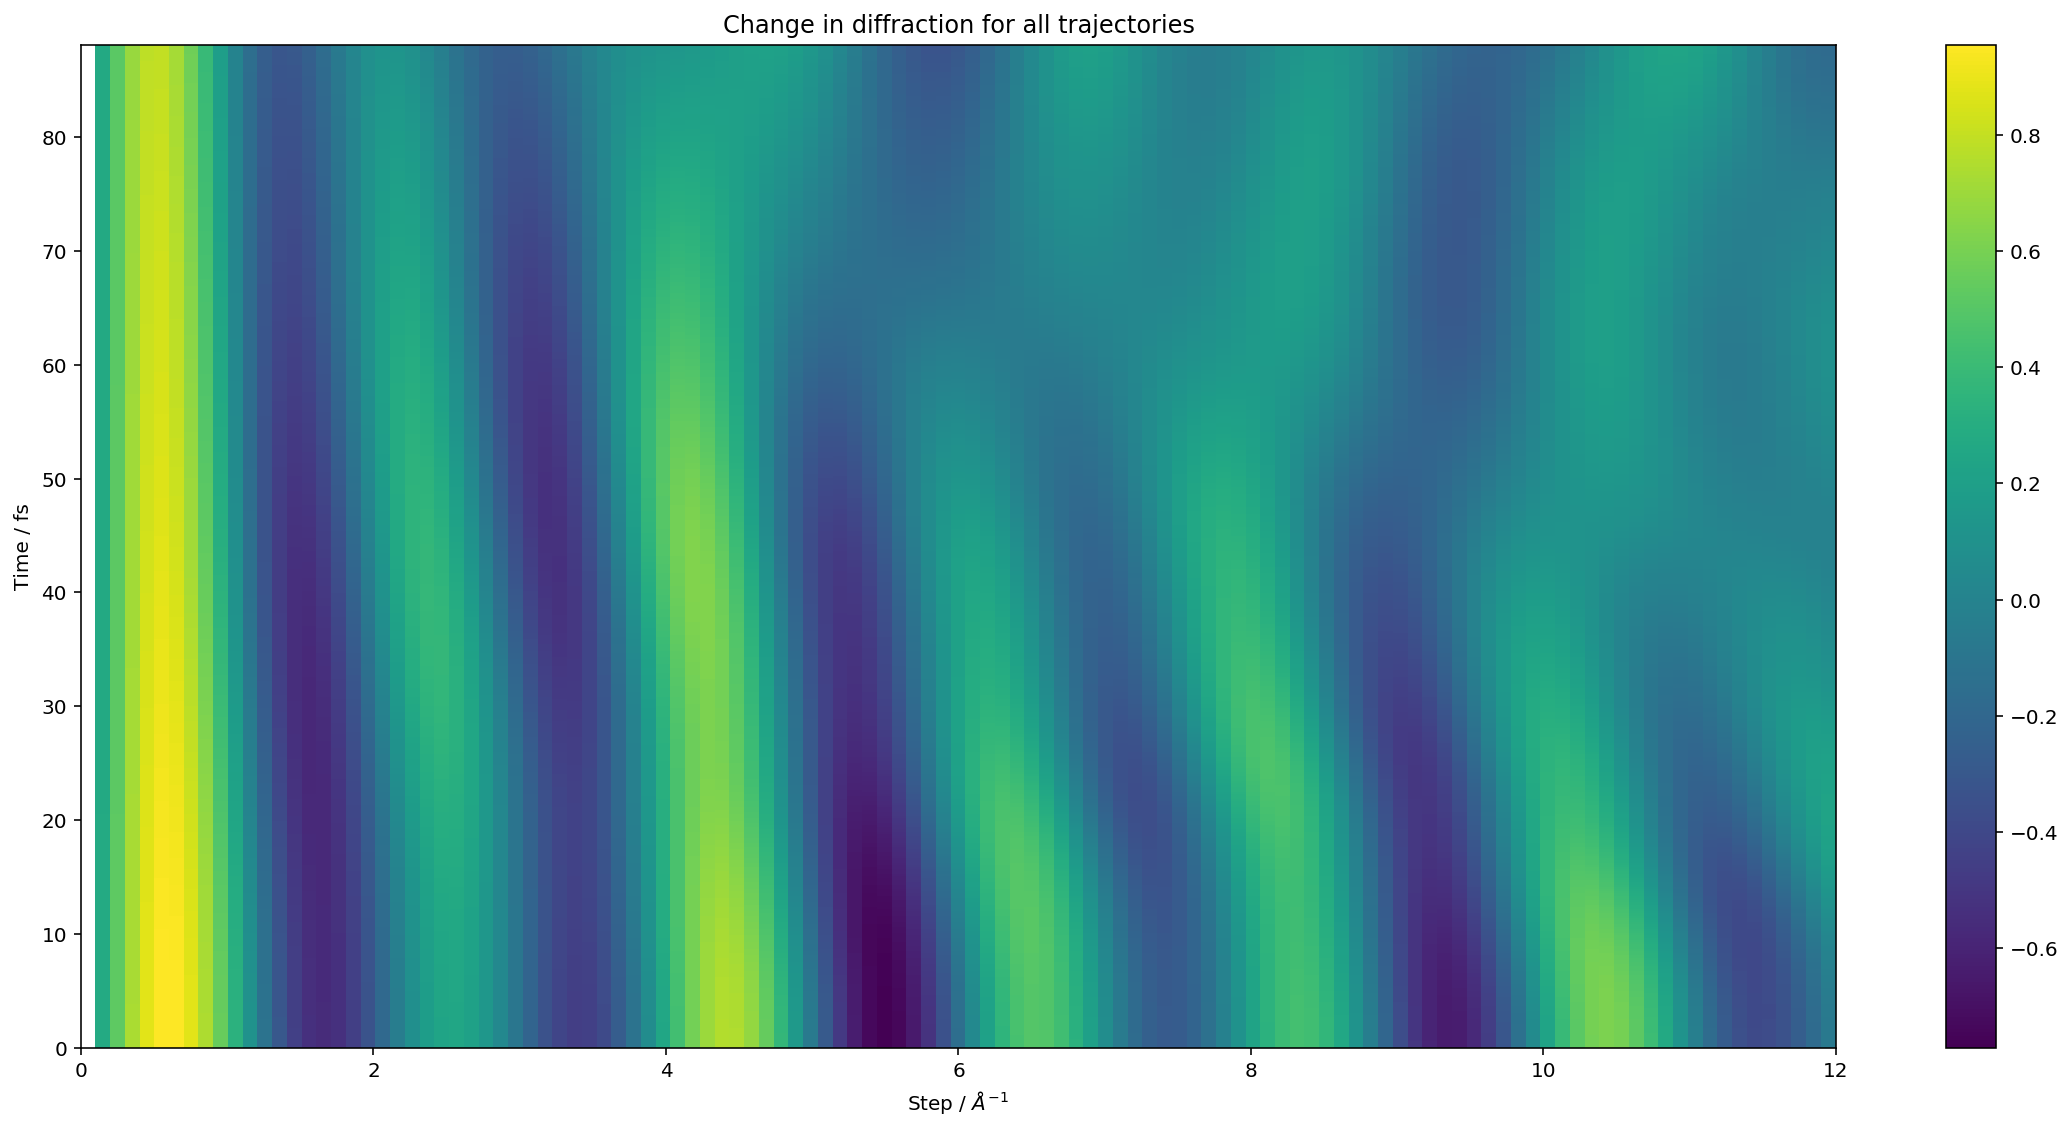

In [49]:
#with meantraj_sM as sM:
save=True

plt.figure( figsize=(16, 8))
plt.subplot(1,1,1)
plt.title('Change in diffraction for all trajectories')
plt.pcolormesh(traj.s,traj.tAxis[:len(meantraj_sM)],meantraj_sM)
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.tight_layout()
if save:
    savestr = 'mean_change_in_diffraction_113traj'
    plt.savefig(savestr + '.pdf')
    plt.savefig(savestr + '.png', dpi=450)
    np.savetxt( savestr + '.csv', meantraj_sM, delimiter=",")
    np.savetxt( savestr + '_t.csv', traj.tAxis, delimiter=",")
    np.savetxt( savestr + '_s.csv', traj.s, delimiter=",")
plt.show()
    

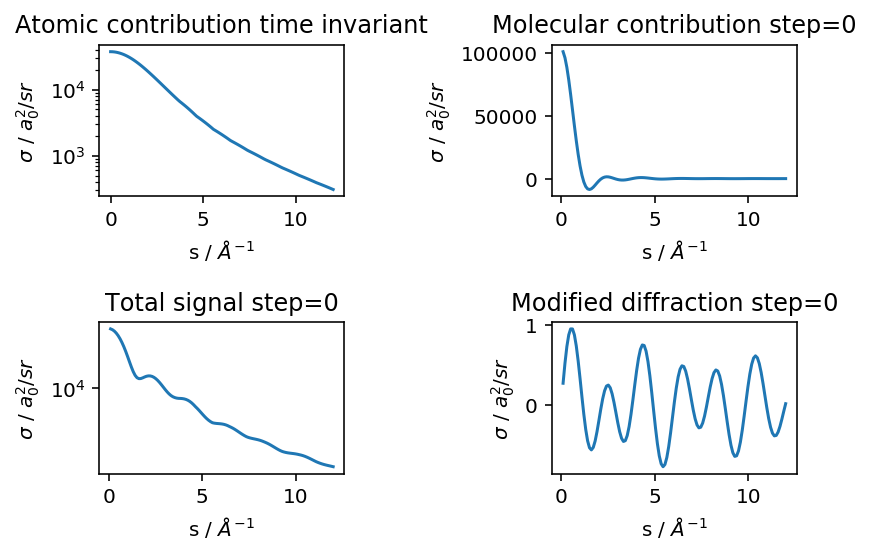

In [63]:
save = True
step = 0
# Figure showing 1D diffraction
plt.figure()

plt.subplot(2,2,1)
plt.title('Atomic contribution time invariant')
plt.semilogy(traj.s,traj.traj_I_at_1D[step])
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,2)
plt.title(f'Molecular contribution step={step}')
plt.plot(traj.s[:len(meantraj_mol)],meantraj_mol[step])
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,3) 
plt.title(f'Total signal step={step}')
plt.semilogy(traj.s,traj.traj_I_at_1D[step]+meantraj_mol[step])
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,4)
plt.title(f'Modified diffraction step={step}')
plt.plot(traj.s[:len(meantraj_sM)],meantraj_sM[step])
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')
plt.tight_layout()

if save:
    savestr = 'diffraction_time_zero_mean113traj'
    plt.savefig(savestr + '.png')


In [75]:
#%%timeit
iso_trajs = mol_trajs(searchStr="*iso*.xyz")
iso_trajs.proc_trajs()

Setting current directory to: /Users/bwt/working/Diffraction_simulation/Traj_SI_113, searching for files that match *iso*.xyz
traj_iso_1.xyz:	nAtoms = 5 & nSteps = 1634.
traj_iso_2.xyz:	nAtoms = 5 & nSteps = 1606.


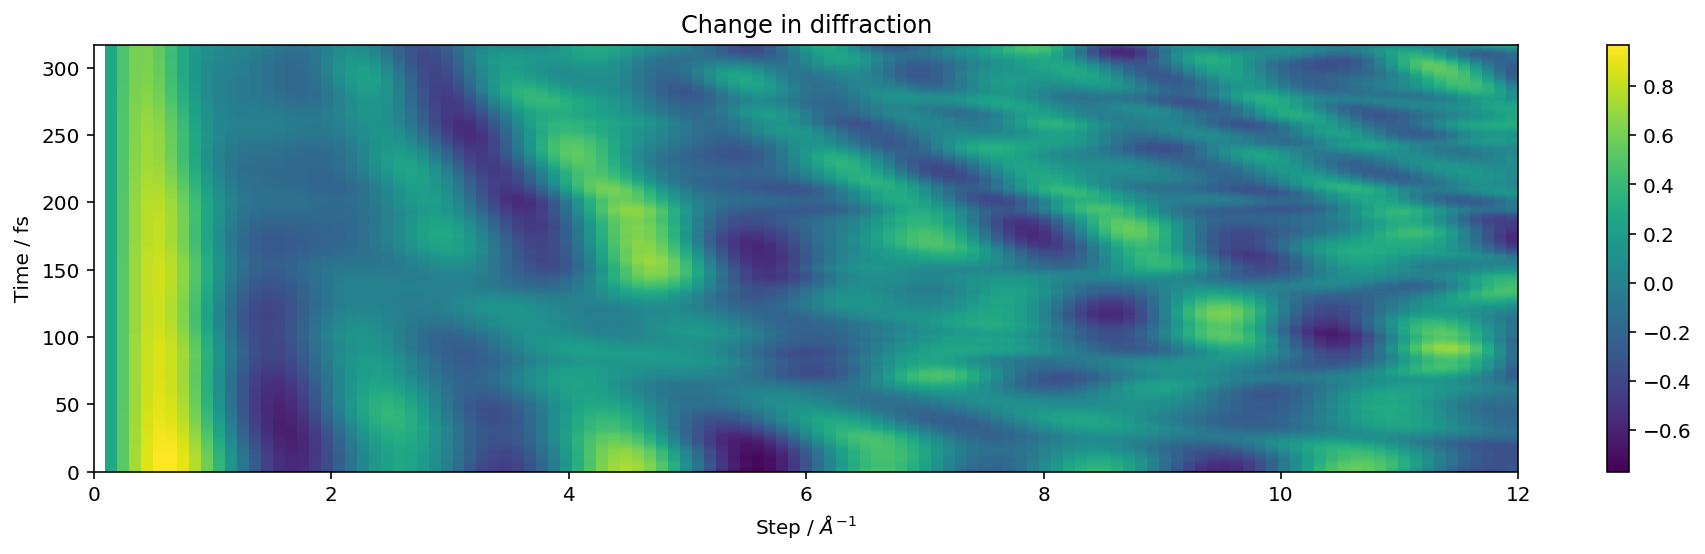

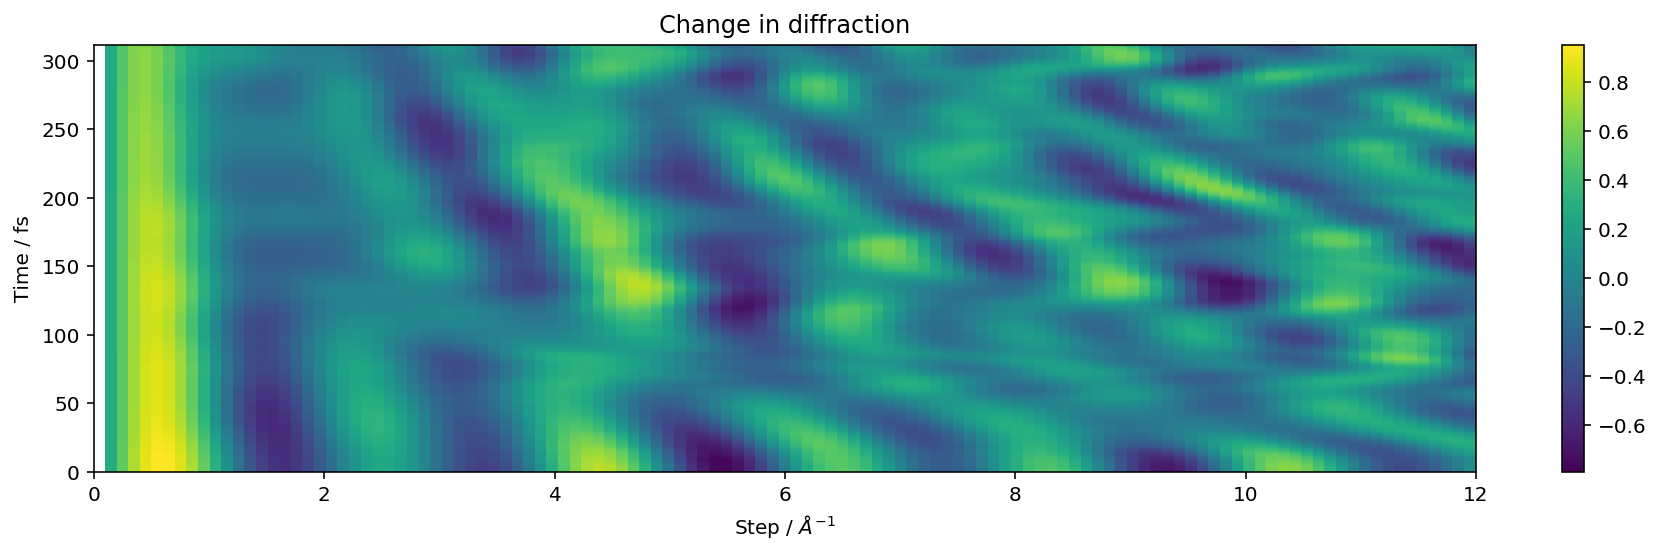

In [76]:
num2show = len(trajs.fnames)

for i, sM in enumerate(iso_trajs.alltraj_sM):
    if i < num2show:
        plt.figure( figsize=(50/num2show, 4))
        plt.subplot(1,num2show,i+1)
        plt.title('Change in diffraction')
        plt.pcolormesh(traj.s,traj.tAxis[:len(sM)],sM)
        plt.xlabel('Step / $\AA^{-1}$')
        plt.ylabel('Time / fs')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

1606
(2, 1606, 120)


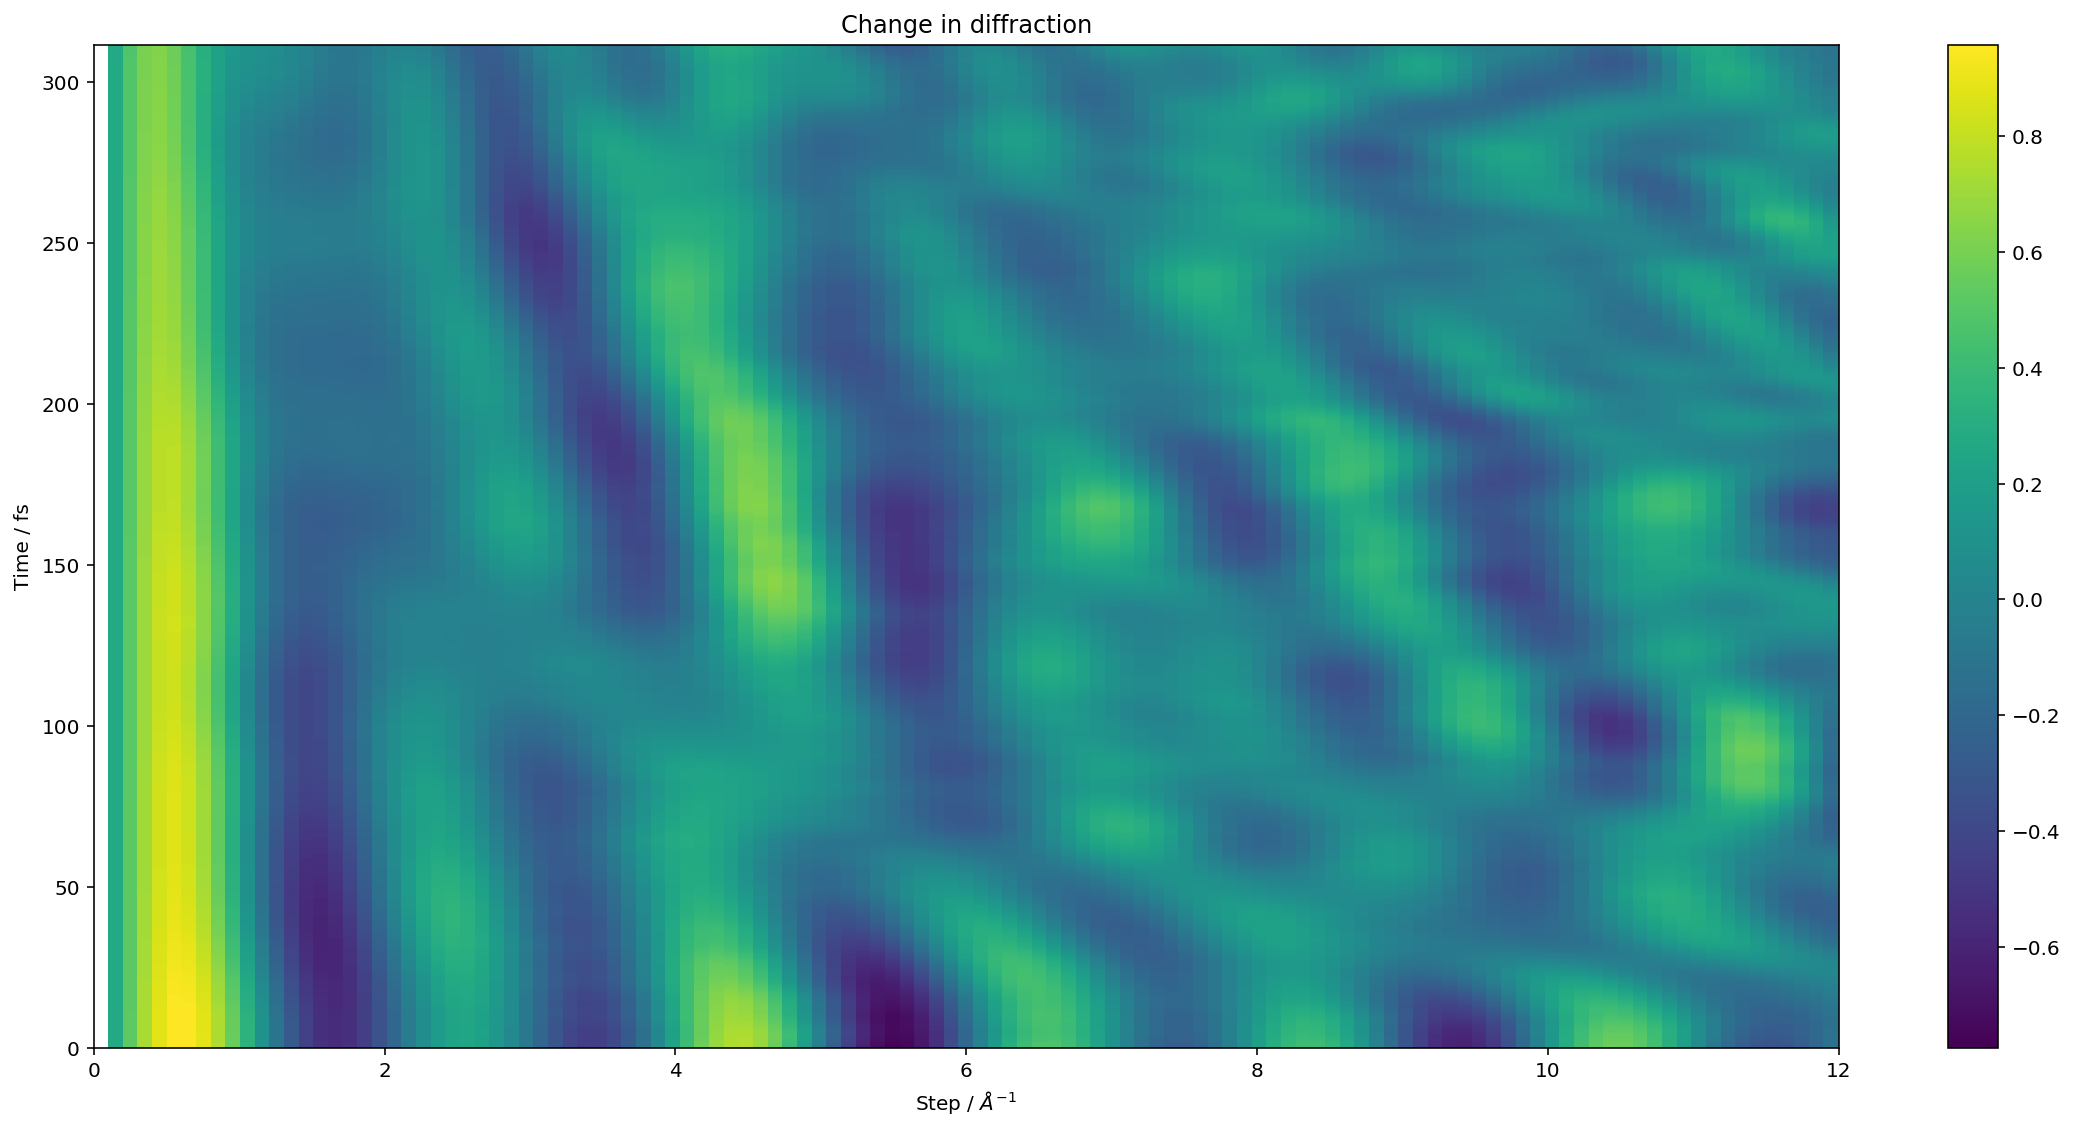

In [95]:
minlen = min(len(sM) for sM in iso_trajs.alltraj_sM)
print(minlen)
iso_trajs_sMnp = np.array([sM[:minlen,:] for sM in iso_trajs.alltraj_sM])
print(iso_trajs_sMnp.shape)
iso_mean_trajs_sM = np.mean(iso_trajs_sMnp, axis=0)
tlen = len(mean_iso_trajs_sM)

iso_trajs_molnp = np.array([sM[:minlen,:] for sM in iso_trajs.alltraj_mol])
iso_mean_trajs_mol = np.mean(iso_trajs_molnp, axis=0)

save=True
iso_taxis = np.linspace(0,tlen*0.194,tlen)
plt.figure(figsize=(16, 8))
plt.subplot(1,1,1)
plt.title('Change in diffraction')
plt.pcolormesh(traj.s,traj.tAxis[:len(iso_mean_trajs_sM)],iso_mean_trajs_sM)
plt.xlabel('Step / $\AA^{-1}$')
plt.ylabel('Time / fs')
plt.colorbar()

plt.tight_layout()
if save:
    savestr = 'mean_change_in_diffraction_2isotraj_10rotations'
    plt.savefig(savestr + '.pdf')
    np.savetxt( savestr + '.csv', iso_mean_trajs_sM, delimiter=",")
    np.savetxt( savestr + '_t.csv', traj.tAxis, delimiter=",")
    np.savetxt( savestr + '_s.csv', traj.s, delimiter=",")
plt.show()

In [92]:
traj.tAxis[700] 

135.86541425818882

In [91]:
traj.tAxis[1000] 

194.09344894026975

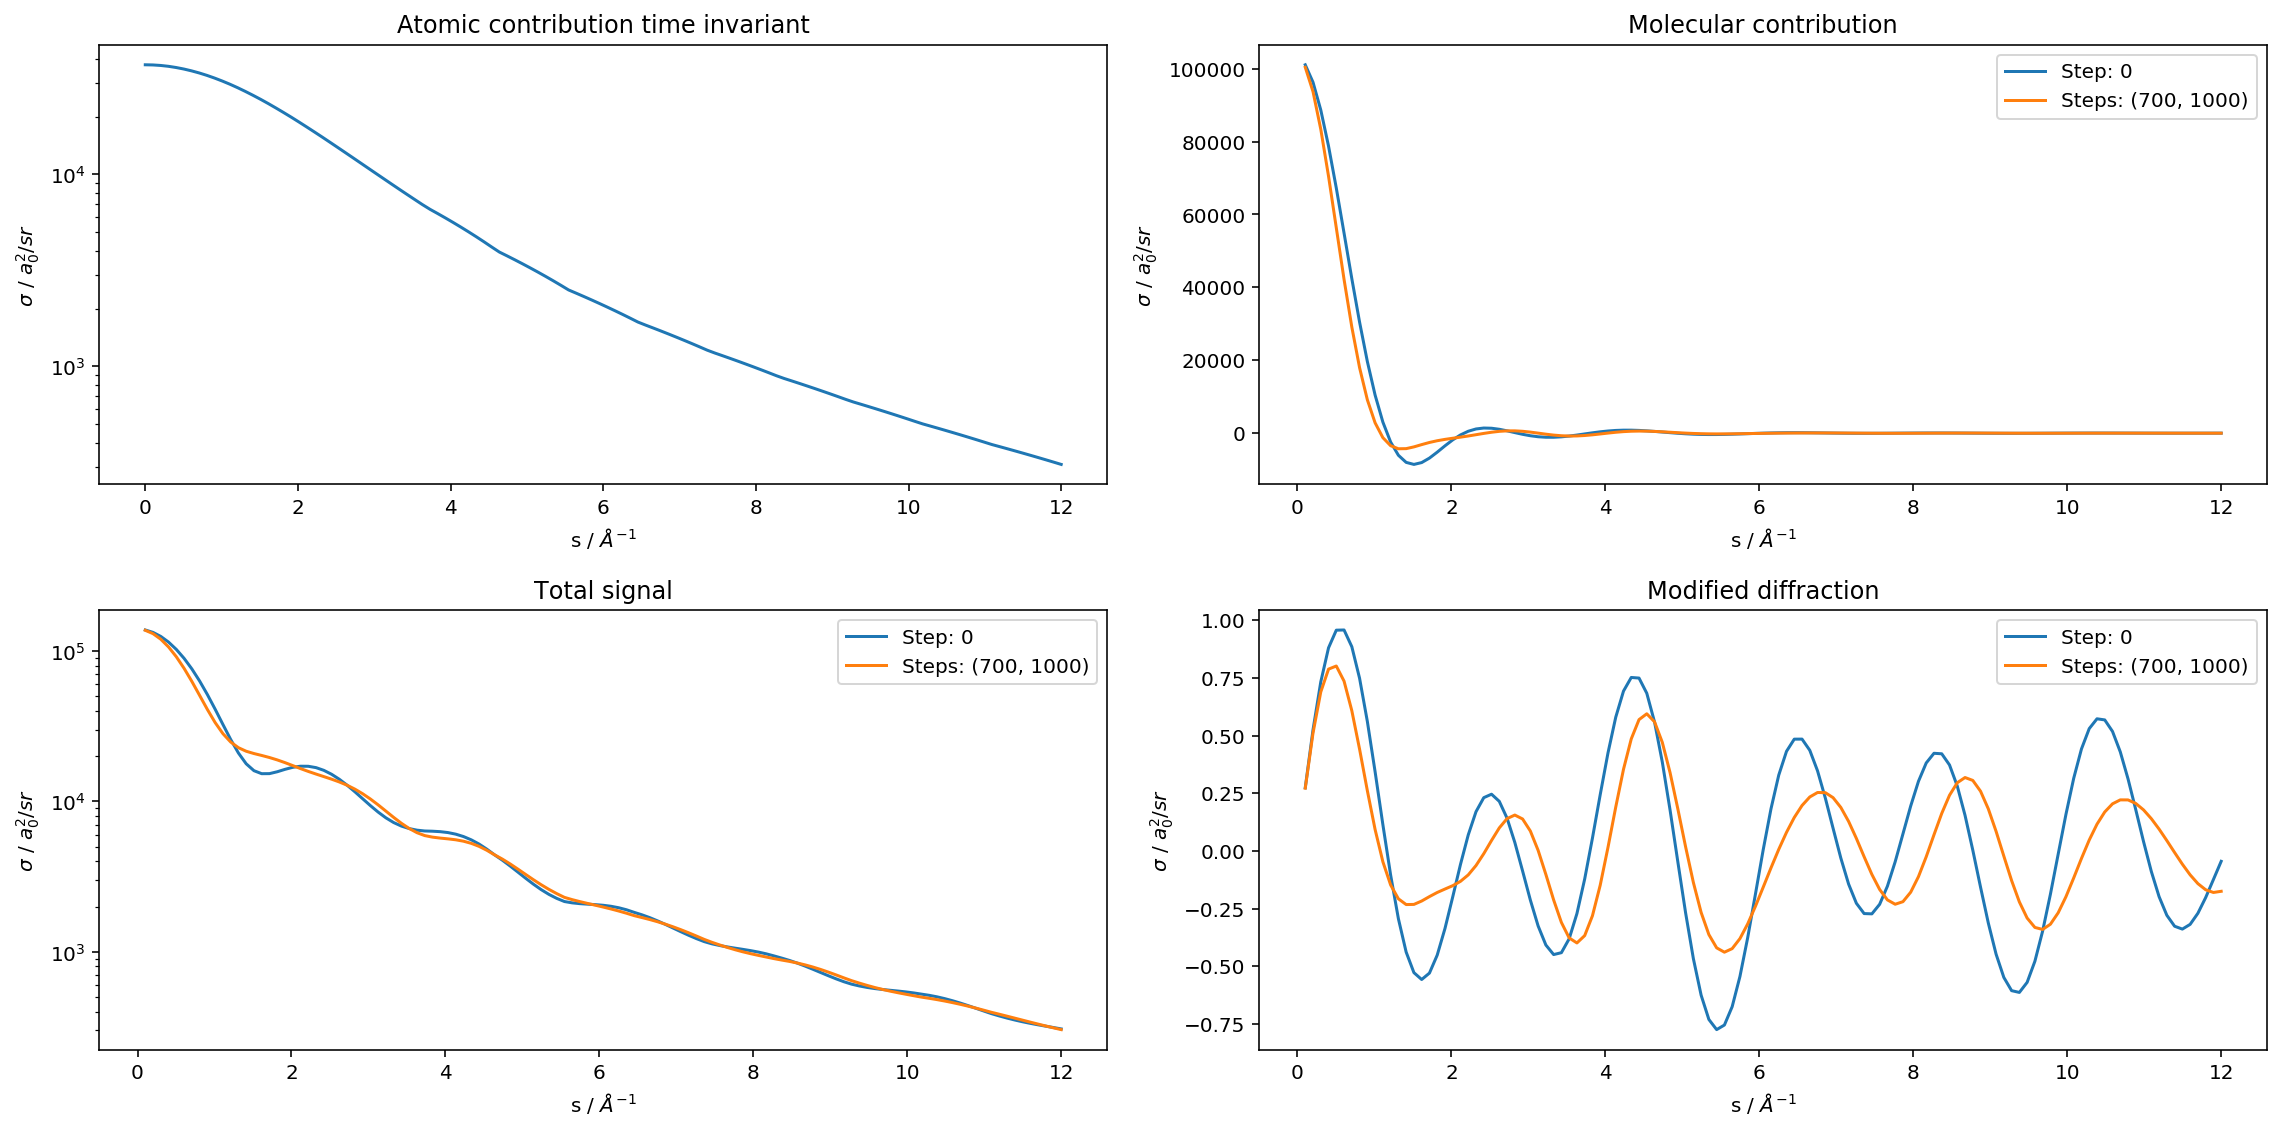

In [112]:
save = True
step = 0
isostep  = (700,1000) # steps in time 700:1000 correspond to 135-194 fs
# Figure showing 1D diffraction
plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
plt.title('Atomic contribution time invariant')
plt.semilogy(traj.s,traj.traj_I_at_1D[step])
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')

plt.subplot(2,2,2)
plt.title(f'Molecular contribution')
plt.plot(traj.s[:len(meantraj_mol)],iso_mean_trajs_mol[step],label=f"Step: {step}")
plt.plot(traj.s[:len(meantraj_mol)],np.mean(iso_mean_trajs_mol[isostep[0]:isostep[1]],axis=0), label=f"Steps: {isostep}")
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')
plt.legend()

plt.subplot(2,2,3) 
plt.title(f'Total signal')
plt.semilogy(traj.s,traj.traj_I_at_1D[step]+iso_mean_trajs_mol[step],label=f"Step: {step}")
plt.semilogy(traj.s,traj.traj_I_at_1D[step]+np.mean(iso_mean_trajs_mol[isostep[0]:isostep[1]],axis=0), label=f"Steps: {isostep}")
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')
plt.legend()

plt.subplot(2,2,4)
plt.title(f'Modified diffraction')
plt.plot(traj.s[:len(meantraj_sM)],mean_iso_trajs_sM[step],label=f"Step: {step}")
plt.plot(traj.s[:len(meantraj_sM)],np.mean(iso_mean_trajs_sM[isostep[0]:isostep[1]],axis=0), label=f"Steps: {isostep}")
plt.xlabel('s / $\AA^{-1}$')
plt.ylabel('$\sigma$ / $a_{0}^{2}/{sr}$')
plt.tight_layout()
plt.legend()

if save:
    savestr = 'diffraction_iso'
    plt.savefig(savestr + '.png')

